# M02 Tạo số ngẫu nhiên

## Mục đích

Giới thiệu cách tạo số ngẫu nhiên bằng thư viện NumPy.


## Nhu cầu tạo số ngẫu nhiên

Khi mô phỏng các vấn đề toán học, bạn thường phải sinh ra một danh sách các giá trị số để thể hiện kết quả của các vấn đề toán học này. Ngoài ra, trong phân tích số liệu, bạn cũng có nhu cầu phát sinh số liệu giả (dummy data) để kiểm tra thử kế hoạch phân tích số liệu. Chúng ta gọi chung là tạo số ngẫu nhiên.

Thông thường các số ngẫu nhiên này sẽ tuân theo một quy luật phân bố (phân phối) xác suất nào đó. Chẳng hạn, chúng ta có thể tạo ra các số cho một biến X tuân theo phân bố chuẩn tắc: $X \sim N(0, 1)$.

In [1]:
import numpy as np

X = np.random.normal(size=20)
X

array([ 0.46129875, -0.95812497, -0.89067557,  0.54841925,  2.41239302,
        1.13233611,  1.56218867,  1.30436834,  1.19377161, -1.56796165,
       -1.51027491, -0.72228641,  1.10668557, -1.18456748, -2.65278356,
        0.22302992, -2.09902182,  1.74508878, -1.22387954,  0.34754404])

## Cơ chế phát sinh số ngẫu nhiên

### Seed

Để phát sinh số ngẫu nhiên một cách hiệu quả, bạn cần biết cơ chế tạo số ngẫu nhiên trong máy tính. Máy tính có một bộ sinh số ngẫu nhiên giả từ các bảng số ngẫu nhiên. Các số trong các bảng này là ngẫu nhiên thực sự, nhưng khi vào trong máy tính, chúng ta hoàn toàn có thể biết được số tiếp theo sẽ là số nào nếu như chúng ta biết được chúng ta sẽ sử dụng bảng nào. Mỗi bảng số ngẫu nhiên này được đánh dấu bởi một seed.

Chúng ta có thể quy định cho NumPy là sẽ sử dụng seed nào để bắt đầu tạo số ngẫu nhiên. Trong trường hợp này, các số mà chúng ta thu được không hoàn toàn là ngẫu nhiên, nhưng ưu điểm của nó là tính tái lập (reproducibility) của kết quả tạo số ngẫu nhiên. Điều này có nghĩa là lần sau khi chạy lại mã lệnh, bạn vẫn sẽ nhìn thấy đúng y hệt kết quả như lần trước.

Hãy xem ví dụ sau để thấy rõ hơn.

In [2]:
np.random.seed(0)    # Chọn seed 0
print(np.random.normal(size=5))
print(np.random.normal(size=5))

np.random.seed(0)
print(np.random.normal(size=5))    # Vẫn sẽ ra 5 số như dòng trên cùng

[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]
[-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]


### Hàm xác suất

Các giá trị được sinh ngẫu nhiên dựa trên một phân bố xác suất, và mỗi phân bố xác suất này có thể được miêu tả bằng một hàm mật độ xác suất (PDF, với biến liên tục) hoặc hàm khối lượng xác suất (PMF, với biến rời rạc).

Chẳng hạn, hàm mật độ xác suất của phân bố chuẩn tắc $N(0, 1)$ là:

$$
\varphi(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} z^2}
$$

và của phân bố chuẩn $N(\mu, \sigma^2)$ là:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2}
$$

Như vậy, để mô tả đặc điểm của phân bố chuẩn, bạn sẽ cần hai tham số là trung bình $\mu$ (mean hay location) và độ lệch chuẩn $\sigma$ (standard deviation hay scale). Các phân bố xác suất khác sẽ yêu cầu những tham số khác, chẳng hạn phân bố Gamma yêu cầu hai tham số $a$ (shape) và $\lambda$ (rate):

$$
\Gamma(x) = \frac{1}{\Gamma(a)} \lambda^a x^a e^{-\lambda x} \frac{1}{x}
$$

Đối với biến rời rạc, chúng ta sẽ có hàm khối lượng xác suất PMF, là xác suất của sự kiện X = giá trị k rời rạc. Ví dụ, phân bố nhị thức (hai tham số $n$ và $p$):

$$
P(X = k) = \left( \begin{matrix} n \\ k \end{matrix} \right) p^k (1-p)^{n-k}
$$

Khi tạo số ngẫu nhiên với kích thước tương đối lớn, chúng ta sẽ thấy phân bố của các giá trị này xấp xỉ hình ảnh biểu đồ của hàm mật độ xác suất hoặc hàm khối lượng xác suất. Xem ví dụ sau đây về phân bố Poisson.

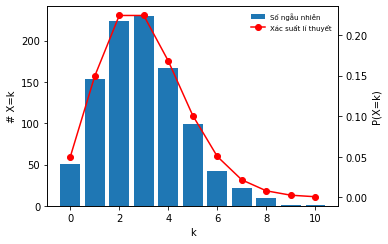

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt

randvec = np.random.poisson(lam=3, size=1000)
x, y_obs = np.unique(randvec, return_counts=True)
y_theory = stats.poisson(mu=3).pmf(x)

_, ax = plt.subplots(figsize=(5.5, 3.5), tight_layout=True)
ax2 = ax.twinx()

ax.bar(x, y_obs, label="Số ngẫu nhiên")
ax2.plot(x, y_theory, "or-", label="Xác suất lí thuyết")

ax.set_xlabel("k")
ax.set_ylabel("# X=k")
ax2.set_ylabel("P(X=k)")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, frameon=False, fontsize="x-small")

plt.show()

## Tạo số ngẫu nhiên bằng NumPy

Tất cả các hàm liên quan đến việc tạo số ngẫu nhiên đều nằm trong thư viện con `numpy.random`. Ở trên bạn đã làm quen với hàm `seed()` để ấn định trước bảng số ngẫu nhiên sẽ sử dụng.

Các hàm tạo số ngẫu nhiên sử dụng tên của phân bố xác suất. Bạn có thể cung cấp các tham số của hàm PDF / PMF hoặc sử dụng giá trị mặc định cho các tham số này. Tất cả các hàm này đều có đối số `size`, cho phép bạn tạo ra một số lượng số ngẫu nhiên theo mong muốn.

Một số phân bố xác suất thông dụng:

Phân bố     | Tham số               | Hàm NumPy
------------|-----------------------|------------------------
Chuẩn | `loc` (trung bình), `scale` (độ lệch chuẩn) | `np.random.normal()`
Gamma | `shape`, `scale` (lambda) | `np.random.gamma()`
Mũ    | `scale` (lambda) | `np.random.exponential()`
Uniform | `low` (a), `high` (b) | `np.random.uniform()`
Nhị thức | `n`, `p` | `np.random.binomial()`
Poisson | `lam` (lambda) | `np.random.poisson()`
Beta | `a`, `b` | `np.random.beta()`

Ngoài ra, không phải lúc nào bạn cũng cần tạo số ngẫu nhiên theo phân bố nào đó. Nếu chỉ cần tạo ra một số các số nguyên ngẫu nhiên, bạn có thể dùng hàm `randint()`.

In [4]:
np.random.randint(5, 25, size=10)

array([ 8, 23,  8, 21,  5, 20,  7, 16, 23,  5])

Hoặc dùng hàm `rand()` để tạo ra các số nằm trong khoảng $[0, 1)$. Bạn có thể tạo ra các mảng nhiều chiều bằng cách cung cấp kích thước của các chiều không gian vào đối số của hàm.

In [5]:
np.random.rand(2, 2, 3)

array([[[9.44689896e-01, 9.79525850e-01, 6.89507611e-01],
        [8.12610484e-04, 8.00508406e-01, 8.88126665e-01]],

       [[9.82277015e-01, 1.95518019e-02, 8.59603333e-01],
        [8.66637458e-01, 1.92718678e-01, 8.38401921e-01]]])

## Chọn mẫu ngẫu nhiên

### Chọn mẫu có hoàn lại

Nếu có một danh sách các số và bạn muốn chọn ngẫu nhiên từ các số này, bạn có thể sử dụng hàm `choice()`. Bạn có thể chọn mẫu có hoàn lại (sampling with replacement), nghĩa là sau khi chọn mẫu xong thì mẫu đã chọn được đưa trở lại khung chọn mẫu để có thể tiếp tục chọn lại. Như vậy, trong chọn mẫu có hoàn lại, một mẫu có thể xuất hiện nhiều lần.

In [6]:
population = range(10)
np.random.choice(population, size=10, replace=True)

array([6, 2, 9, 5, 1, 4, 3, 3, 1, 5])

Thông thường chúng ta sử dụng chọn mẫu có hoàn lại để sinh giá trị ngẫu nhiên cho một biến danh mục (categorical variables) với tỉ lệ các mục (level) cho trước. Chẳng hạn, chúng ta sinh ngẫu nhiên 100 người trong đó có 40% là nam (mã hóa là 0). Để thiết lập mức tỉ lệ mong muốn cho mỗi level, bạn cung cấp một danh sách tỉ lệ cho đối số `p`.

*Lưu ý*: do chọn mẫu ngẫu nhiên, bạn hầu như sẽ không bao giờ chọn chính xác được đúng 40% nam.

In [7]:
sex = np.random.choice([0, 1], size=100, replace=True, p=[0.4, 0.6])
np.unique(sex, return_counts=True)

(array([0, 1]), array([43, 57], dtype=int64))

Nếu muốn chọn đúng 40% nam nhưng theo thứ tự ngẫu nhiên, chúng ta dùng hàm `shuffle()`.

In [8]:
sex = [0] * 40 + [1] * 60
np.random.shuffle(sex)
print(sex)

[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]


Phép nhân danh sách với `k` có tác dụng kéo dài danh sách ra `k` lần. Sau khi tạo ra danh sách có 100 phần tử, trong đó 40 phần tử đầu là nam (0) và 60 phần tử sau là nữ (1), chúng ta xáo trộn (shuffle) thứ tự của các phần tử này để có được một danh sách ngẫu nhiên nam và nữ.

### Chọn mẫu không hoàn lại

Đối với chọn mẫu không hoàn lại, chúng ta không đưa lại mẫu đã chọn vào khung chọn mẫu, do vậy mỗi mẫu được chọn chỉ xuất hiện một lần duy nhất. Khung chọn mẫu phải có kích thước ít nhất bằng cỡ mẫu. Kĩ thuật này được dùng rất phổ biến trong sampling và cross-validation.

In [9]:
population = range(1000)
np.random.choice(population, size=10, replace=False)

array([119, 887, 526, 541,  98, 883, 171, 767, 351, 200])

## Luyện tập

Chúng ta sẽ tạo ra một quần thể phân bố hai đỉnh. Có nhiều cách để tạo phân bố hai đỉnh, nhưng một cách đơn giản là trộn (mix) hai phân bố một đỉnh vào với nhau. Chẳng hạn, bạn có thể tạo ra 1000 giá trị tuân theo phân bố Gamma(a=3, lambda=1) và 1000 giá trị phân bố chuẩn N(loc=11, scale=2) và ghép hai mảng này vào với nhau (bằng hàm `np.concatenate()`).

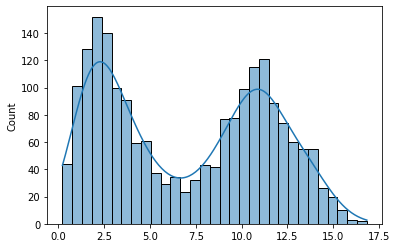

In [10]:
import seaborn as sns

a_gamma = np.random.gamma(3, 1, size=1000)
a_norm = np.random.normal(11, 2, size=1000)
a = np.concatenate([a_gamma, a_norm])

sns.histplot(a, bins=31, kde=True)
plt.show()

---

[Bài trước](./01_vectorized.ipynb) - [Danh sách bài](../README.md) - [Bài sau]()